In [7]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("uwsgi1.csv.gz", parse_dates=[1])

In [14]:
df['exception'] = df['exception'].apply(lambda x: x.split('error 47 from memcached_get')[0])

In [15]:
df[['exception', 'url']].groupby(['exception']).count().sort_values('url', ascending=False)

,url
exception,
pylibmc.ServerDown:,141
OperationalError: (OperationalError) server closed the connection unexpectedly,67
AttributeError: 'str' object has no attribute 'id',17
pylibmc.Error: error 31 from memcached_set: A TIMEOUT OCCURRED,16
ResourceClosedError: This result object does not return rows. It has been closed automatically.,13
DatabaseError: (DatabaseError) server closed the connection unexpectedly,12
sqlalchemy.exc.OperationalError: (OperationalError) server closed the connection unexpectedly,11
"DatabaseError: (DatabaseError) error with no message from the libpq 'SELECT system_info.id AS system_info_id, system_info.key AS system_info_key, system_info.value AS system_info_value, system_info.state AS system_info_state, system_info.revision_id AS system_info_revision_id \nFROM system_info \nWHERE system_info.key = %(key_1)s \n LIMIT %(param_1)s' {'key_1': 'ckan.config_update', 'param_1': 1}",10
DatabaseError: (DatabaseError) error with no message from the libpq None None,10


In [19]:
def category(x):
    for p in ('unexpectedly', 'libpq', 'automatically', 'synchronization'):
        if p in x:
            return 'postgres'
    if 'pylibmc' in x:
        return 'memcache'
    for c in ('AttributeError', 'ProgrammingError', 'TypeError'):
        if c in x:
            return 'ckan'
    return 'unknown'

df['category'] = df['exception'].apply(category)

In [21]:
df[['category','url']].groupby(['category']).count().sort_values('url', ascending=False)

,url
category,
postgres,163
memcache,158
unknown,35
ckan,29


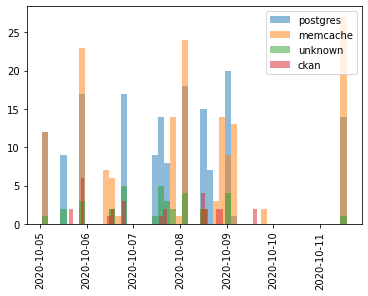

In [26]:
fig, ax = plt.subplots()
ax.hist(df[df['category'] == 'postgres']['date'], alpha=0.5, bins=50, label='postgres')
ax.hist(df[df['category'] == 'memcache']['date'], alpha=0.5, bins=50, label='memcache')
ax.hist(df[df['category'] == 'unknown']['date'], alpha=0.5, bins=50, label='unknown')
ax.hist(df[df['category'] == 'ckan']['date'], alpha=0.5, bins=50, label='ckan')
ax.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()